In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers, optimizers
from os import environ

environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Loading datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape, '\n')
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape, '\n')

Using TensorFlow backend.


('Train images shape:', (60000, 28, 28))
('Train labels shape:', (60000,), '\n')
('Test images shape:', (10000, 28, 28))
('Test labels shape:', (10000,), '\n')


In [5]:
# Showing the First MNIST handwritten number
# plt.imshow(train_images[1], cmap='Greys')
# plt.show()
# print('Train image label shown:', train_labels[1], '\n')

# Training, Validation and Test datasets
valid_images = train_images[50000:60000]
valid_labels = train_labels[50000:60000]
train_images = train_images[0:50000]  # test images remain untouched
train_labels = train_labels[0:50000]

# Creating Tensors
train_images = train_images.reshape((50000, 28, 28, 1))
train_images = train_images.astype('float32') / 255  # converting to a [0, 1] scale
valid_images = valid_images.reshape((10000, 28, 28, 1))
valid_images = valid_images.astype('float32') / 255  # converting to a [0, 1] scale
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255  # converting to a [0, 1] scale

# One-hot encode labels
print('A label:', train_labels[19])
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)
print('A one-hot encode label:', train_labels[19])

# CNN Architecture
my_model = models.Sequential()
my_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
                           use_bias=True, input_shape=(28, 28, 1)))
my_model.add(layers.Activation('relu'))
my_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), use_bias=True))
my_model.add(layers.Activation('relu'))

my_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

my_model.add(layers.Dropout(rate=0.2))

my_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), use_bias=True))
my_model.add(layers.Activation('relu'))

my_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

my_model.add(layers.Flatten())

my_model.add(layers.Dropout(rate=0.2))

my_model.add(layers.Dense(units=10, use_bias=True))
my_model.add(layers.Activation('relu'))

my_model.add(layers.Dense(units=10, use_bias=True))
my_model.add(layers.Activation('softmax'))

# CNN Summary
my_model.summary()

# CNN Loss and Optimizer
compile = my_model.compile(optimizers.sgd(lr=0.3, decay=0.01), loss='categorical_crossentropy',
                           metrics=['accuracy'])

# CNN Training
fit = my_model.fit(x=train_images, y=train_labels, batch_size=2500, epochs=20,
                   validation_data=(valid_images, valid_labels))

# Save Model
my_model.save(filepath=r'model_save.h5', overwrite=True)

11493376/11490434 [==============================] - 11s 1us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,) 

Test images shape: (10000, 28, 28)
Test labels shape: (10000,) 

A label: 9
A one-hot encode label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2320      
__________

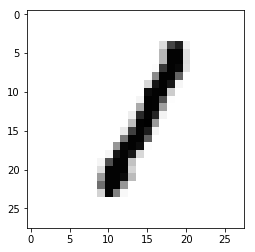

The Random Number Image Prediction is: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
10000/10000 [==============================] - 1s 51us/step
Evaluation Accuracy is: 96.55%


In [6]:
from keras.models import load_model
from numpy import random

environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Loading Model
my_model = load_model(filepath=r'model_save.h5')
print(my_model.summary(), '\n')

# Showing Parameters: Weights and Biases
print('Last node Biases:')
print(my_model.get_weights()[-1])
print('Last node Weights:')
print(my_model.get_weights()[-2])

# Loading MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
rand_n = random.randint(0, 10000)
rand_i = test_images[rand_n]
plt.imshow(rand_i, cmap='Greys')
plt.show()

# Predicting a Random Number Image
pred = my_model.predict(rand_i.reshape(1, 28, 28, 1), batch_size=1)
print('The Random Number Image Prediction is: {}'.format(pred))

# Evaluation test over Test dataset
test_images = test_images.reshape((10000, 28, 28, 1))
test_labels = to_categorical(test_labels)
(eval_l, eval_acc) = my_model.evaluate(test_images, y=test_labels, batch_size=10000)
print('Evaluation Accuracy is: {:4.2f}%'.format(eval_acc*100))